## Plotting the pressure data from Krakow experiment

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
file = '/home/rishabhstein/Downloads/PZ103_PressureLog.csv'
df = pd.read_csv(file,sep=';', skiprows=4)

### Copying differential pressure and time column

In [214]:
df_copy = df.iloc[:,8:10]
df_copy.tail()

,Time SN:702643 (S30X):CH0,SN:702643 (S30X):CH0 bar
1480,7/31/2020 12:47:35 PM.164,0.3065643
1481,7/31/2020 12:47:45 PM.165,0.3124771
1482,7/31/2020 12:47:55 PM.161,0.314949
1483,7/31/2020 12:48:05 PM.172,0.0491943
1484,7/31/2020 12:48:05 PM.950,#NV


### Dropping last column (contains non numeric values)

In [215]:
df_copy = df_copy.drop([1484])

In [218]:
for i in range(len(df_copy['Time SN:702643 (S30X):CH0'])):
    timestamp = df['Time SN:702643 (S30X):CH0'][i].split()
    timestamp[2] = timestamp[2].split('.',1)[0]
    df_copy['Time SN:702643 (S30X):CH0'][i] = timestamp[0] + " " + timestamp[1] #+ " " + timestamp[2]
    #print(timestamp[0] + " " + timestamp[1] + " " + timestamp[2])


### Converting to datetime objects

In [219]:
df_copy['Time SN:702643 (S30X):CH0'] = pd.to_datetime(df_copy['Time SN:702643 (S30X):CH0'])

### Setting time column as index

In [221]:
df_copy = df_copy.set_index('Time SN:702643 (S30X):CH0')

In [222]:
df_copy.info

<bound method DataFrame.info of                           SN:702643 (S30X):CH0 bar
Time SN:702643 (S30X):CH0                         
2020-07-31 08:40:55                      4.8804741
2020-07-31 08:41:05                      0.9732552
2020-07-31 08:41:15                      0.2718887
2020-07-31 08:41:25                      2.4760895
2020-07-31 08:41:35                      4.6152115
...                                            ...
2020-07-31 12:47:25                      0.3181305
2020-07-31 12:47:35                      0.3065643
2020-07-31 12:47:45                      0.3124771
2020-07-31 12:47:55                       0.314949
2020-07-31 12:48:05                      0.0491943

[1484 rows x 1 columns]>

### Converting pressure column from string to numeric values

In [224]:
df_copy['SN:702643 (S30X):CH0 bar'] = pd.to_numeric(df_copy['SN:702643 (S30X):CH0 bar'])

Text(0.5, 0, 'Time')

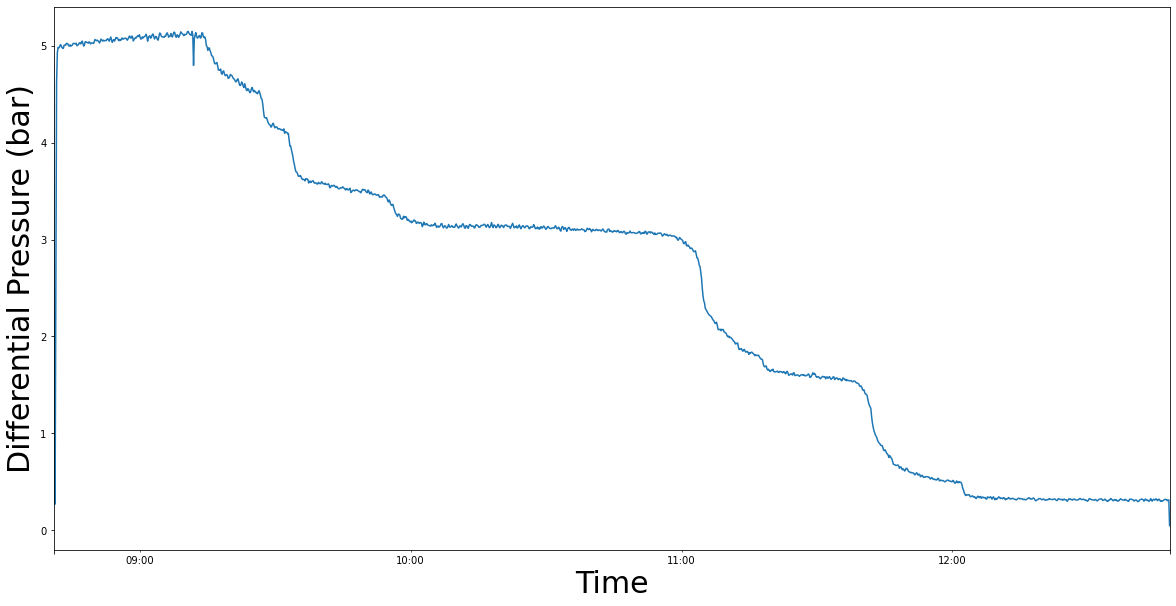

In [229]:
plt.figure(figsize=[20,10])
df_copy['SN:702643 (S30X):CH0 bar'].plot()
plt.ylabel('Differential Pressure (bar)',fontsize = 30)
plt.xlabel('Time', fontsize = 30)